<a href="https://colab.research.google.com/github/emmendezp/AlgorithmsUN2021II/blob/main/Lab%2014/AlgorithmicToolboxWeek4Group24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algorithmic Toolbox Week 4

## 4-1: Binary Search

In [ ]:
import sys
import math

def binary_search(a, x):
    left, right = 0,len(a)
    while left <= right:
        m = math.floor((left + right) / 2)
        if m >= len(a) or m<0:
            break;
        if a[m] < x:
            left = m + 1
        elif a[m] > x:
            right = m - 1
        else:
            return m
    return -1

def linear_search(a, x):
    for i in range(len(a)):
        if a[i] == x:
            return i
    return -1

if __name__ == '__main__':
    input = sys.stdin.read()
    data = list(map(int, input.split()))
    n = data[0]
    m = data[n + 1]
    a = data[1 : n + 1]
    for x in data[n + 2:]:
        # replace with the call to binary_search when implemented
        print(binary_search(a, x), end = ' ')

## 4-2: Binary Search with Duplicates

In [ ]:
# Uses python3
def binary_search(key, query, low, high):
    if high < low:
      return -1
    mid = low + (high-low)//2
    if key == query[mid]:
      if mid-1 < 0:
        return mid
      if query[mid-1] != key:
        return mid
      return binary_search(key, query, low, mid-1)
    elif key < query[mid]:
      return binary_search(key, query, low, mid-1)
    else:
      return binary_search(key, query, mid+1, high)
    return -1

n = int(input())
a = list(map(int, input().split()))
k = int(input())
b = list(map(int, input().split()))

result = []

for x in b:
  result.append(binary_search(x, a, 0, len(a)-1))

print(*result)

## 4-3: Majority Element

In [ ]:
n = int(input())
seq = [int(i) for i in input().split()]


def divide_func(seq, l, r):
    if l+1==r:
        return seq[l]
    elif l+2==r:
        return seq[l]
    m = (l+r)//2
    left = divide_func(seq, l, m)
    right = divide_func(seq, m, r)

    c1, c2 = 0, 0
    for i in seq[l:r]:
        if i == left:
            c1+=1
        elif i == right:
            c2+=1
    if c1>(r-l)//2 and left != -1:
        return left
    elif c2>(r-l)//2 and right != -1:
        return right
    else: 
        return -1

print(int(divide_func(seq, 0, n) != -1))

## 4-4: Improving QuickSort

In [ ]:
# Use python3
import sys

def merge(left,right):
    count,i,j,res = 0,0,0,[]
    while i < len(left) and j < len(right):
        if left[i] > right[j]:
            res.append(right[j])
            j += 1
            count += (len(left)-i)
        else:
            res.append(left[i])
            i += 1
    return res + left[i:] + right[j:],count

def get_number_of_inversions(a, b, left, right):
    length_array = len(a)
    if length_array <=1:
        return a,0
    ave = length_array // 2
    left_arr, number_of_inversions_left = get_number_of_inversions(a[:ave], b, left, ave)
    right_arr, number_of_inversions_right = get_number_of_inversions(a[ave:], b, ave, right)
    merged, count = merge(left_arr,right_arr)
    count += (number_of_inversions_left + number_of_inversions_right)
    return merged, count

if __name__ == '__main__':
    input = sys.stdin.read()
    n, *a = list(map(int, input.split()))
    b = n * [0]
    print(get_number_of_inversions(a, b, 0, len(a))[1])

## 4-5: Inversions

In [ ]:
def merge(left, right):
    i, j, inversion_counter = 0, 0, 0
    final = list()
    while i < len(left) and j< len(right):
        if left[i] <= right[j]:
            final.append(left[i])
            i += 1
        else:
            final.append(right[j])
            inversion_counter += len(left) - i
            j += 1

    final += left[i:]
    final += right[j:]
        
    return final, inversion_counter

def mergesort(arr):
    global tot_count
    if len(arr) <= 1:
        return arr
    mid = len(arr)//2

    left = mergesort(arr[:mid])
    right = mergesort(arr[mid:])

    sorted_arr, temp = merge(left, right)
    tot_count += temp

    return sorted_arr

tot_count = 0
n = int(input())
seq = [int(i) for i in input().split()]
mergesort(seq)
print(tot_count)




## 4-6: Organizing a Lottery

In [ ]:
master_list = list()
s, p = [int(i) for i in input().split()]

for i in range(s):
    a, b = [int(i) for i in input().split()]
    master_list.append((a,'l'))
    master_list.append((b,'r'))

points = input().split()
for i in points:
    master_list.append((int(i),'p'))

master_list.sort()

segment_count = 0
point_segment_map = dict()
for i in master_list:
    if i[1] == 'l': segment_count += 1
    elif i[1] == 'r': segment_count -= 1
    else:
        point_segment_map[i[0]] = segment_count

temp = ''
for i in points:
    temp += str(point_segment_map[int(i)]) + ' '
print(temp[:-1])

## 4-7:Closest Points

In [ ]:
import math
def dist(p1, p2):
    return math.sqrt((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2)

def closest_split_pair(p_x, p_y, delta, best_pair):
    ln_x = len(p_x)  # store length - quicker
    mx_x = p_x[ln_x // 2][0]  # select midpoint on x-sorted array

    # Create a subarray of points not further than delta from midpoint on x-sorted array
    s_y = [x for x in p_y if mx_x - delta <= x[0] <= mx_x + delta]

    best = delta  # assign delta value to best
    ln_y = len(s_y)  # store length of subarray for quickness
    for i in range(ln_y - 1):
        for j in range(i+1, min(i + 5, ln_y)):    # We have to check only next 5 points; proof found in literature
            p, q = s_y[i], s_y[j]
            dst = dist(p, q)
            if dst < best:
                best_pair = p, q
                best = dst
    return best_pair[0], best_pair[1], best


def brute(ax):
    mi = dist(ax[0], ax[1])
    p1 = ax[0]
    p2 = ax[1]
    ln_ax = len(ax)
    if ln_ax == 2:
        return p1, p2, mi
    for i in range(ln_ax-1):
        for j in range(i + 1, ln_ax):
            if i != 0 and j != 1:
                d = dist(ax[i], ax[j])
                if d < mi:  # Update min_dist and points
                    mi = d
                    p1, p2 = ax[i], ax[j]
    return p1, p2, mi


def closest_pair(ax, ay):
    ln_ax = len(ax)  # It's quicker to assign variable
    if ln_ax <= 3:
        return brute(ax)  # A call to bruteforce comparison
    mid = ln_ax // 2  # Division without remainder, need int
    Qx = ax[:mid]  # Two-part split
    Rx = ax[mid:]

    midpoint = ax[mid][0]
    Qy = list()
    Ry = list()
    for x in ay:  # split ay into 2 arrays using midpoint
        if x[0] < midpoint:
           Qy.append(x)
        else:
           Ry.append(x)
    # Call recursively both arrays after split
    (p1, q1, mi1) = closest_pair(Qx, Qy)
    (p2, q2, mi2) = closest_pair(Rx, Ry)

    # Determine smaller distance between points of 2 arrays
    if mi1 <= mi2:
        d = mi1
        mn = (p1, q1)
    else:
        d = mi2
        mn = (p2, q2)

    # Call function to account for points on the boundary
    (p3, q3, mi3) = closest_split_pair(ax, ay, d, mn)
    # Determine smallest distance for the array
    if d <= mi3:
        return mn[0], mn[1], d
    else:
        return p3, q3, mi3


def solution(a):
    ax = sorted(a, key=lambda x: x[0])  # Presorting x-wise O(nlogn)
    ay = sorted(a, key=lambda x: (x[1], x[0]))  # Presorting y-wise then x-wise O(nlogn)
    p1, p2, mi = closest_pair(ax, ay)  # Recursive D&C function
    return mi


# Input
points = list()
n = int(input())
for i in range(n):
    points.append([int(i) for i in input().split()])

print(solution(points))

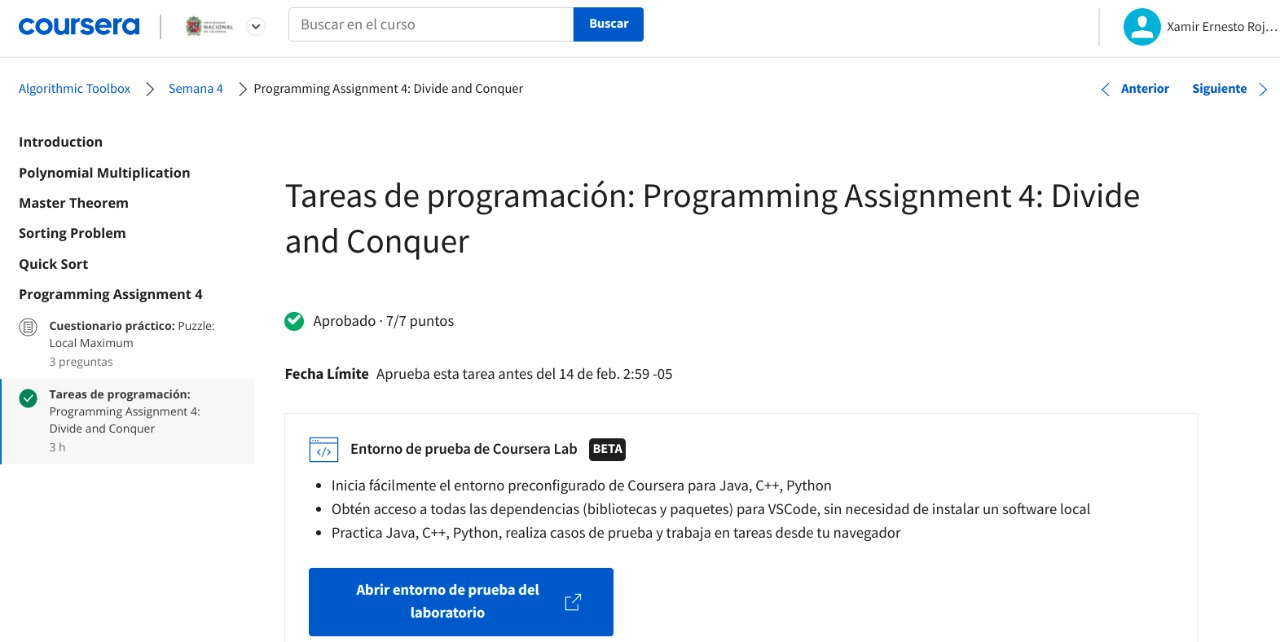

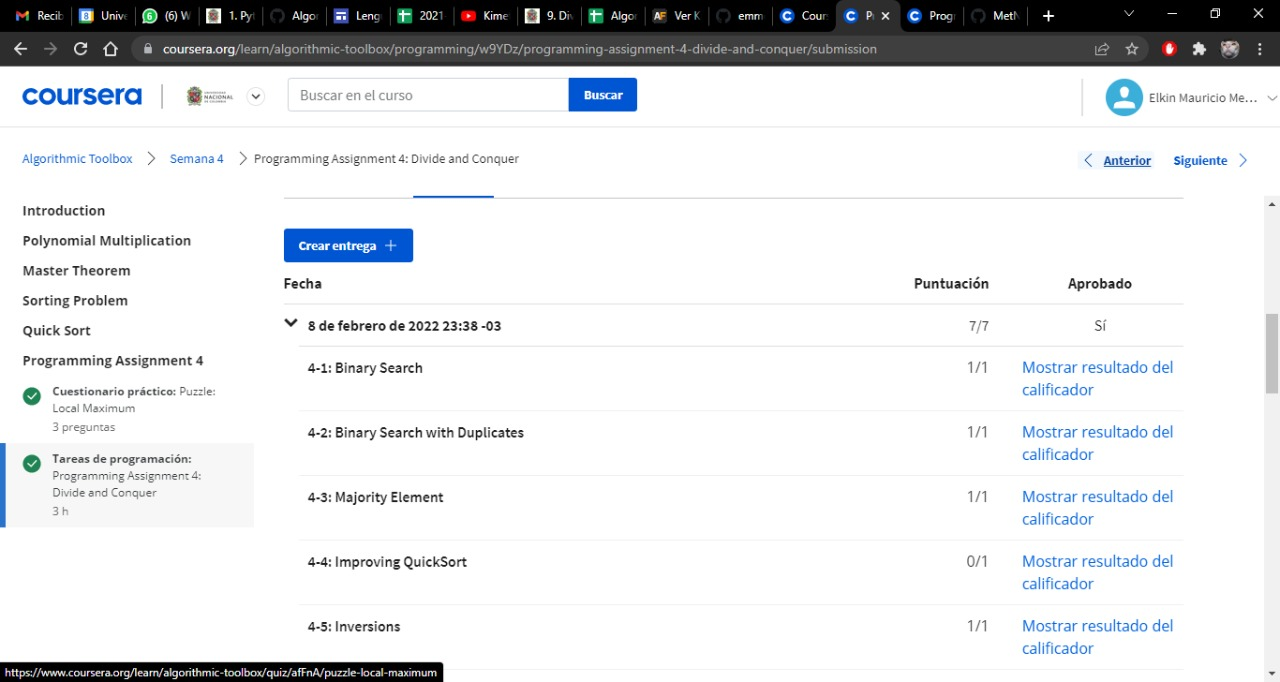

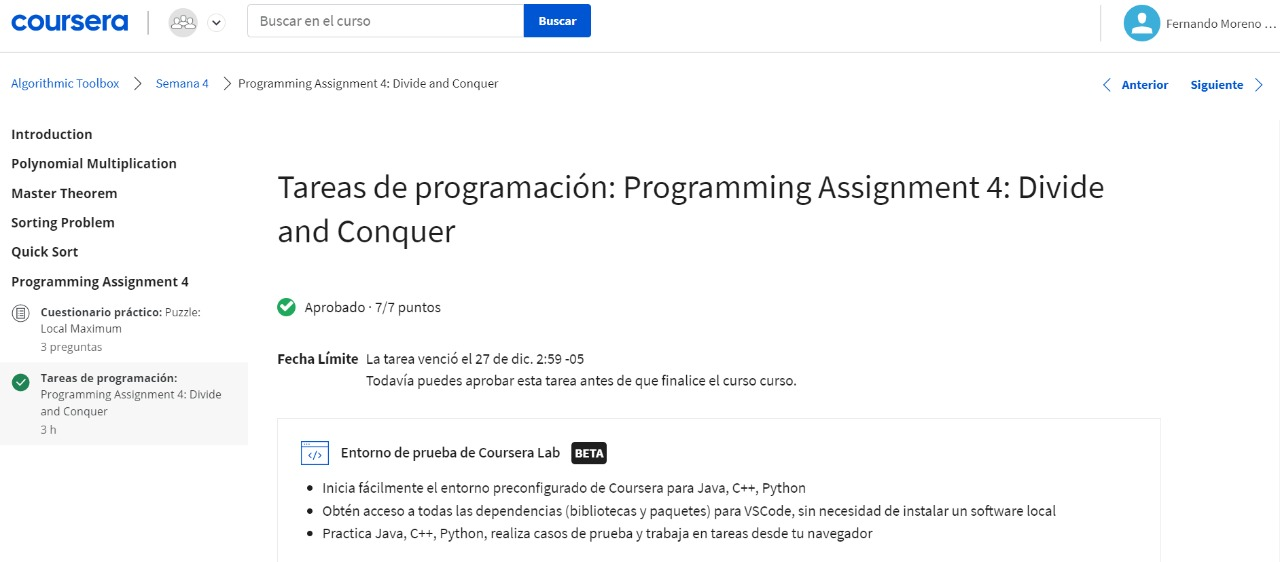